<a href="https://colab.research.google.com/github/dlcrdz66/SQL_Stuff/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predict a future price of a stock

In [ ]:
# IMPORT Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [ ]:
#Collect and clean the data
df = pd.read_csv('stock_data.csv')
df = df.dropna()

#Look at the Data

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(-2000.0, 0, '2014-04-16'),
  Text(0.0, 0, '1980-12-12'),
  Text(2000.0, 0, '1988-11-09'),
  Text(4000.0, 0, '1996-10-08'),
  Text(6000.0, 0, '2004-09-21'),
  Text(8000.0, 0, '2012-08-28'),
  Text(10000.0, 0, '2020-08-11'),
  Text(12000.0, 0, '')])

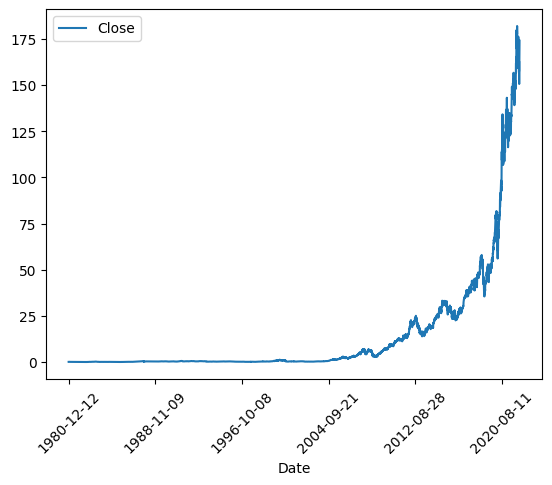

In [ ]:
#Show the Data visually

df.plot(x="Date", y="Close")
plt.xticks(rotation=45)

In [ ]:
#Create the model
model = RandomForestRegressor()

In [ ]:
#Train the model
X = df[['Open', 'High', 'Low', 'Volume']]
X = X[:int(len(df)-1)]
y = df['Close']
y = y[:int(len(df)-1)]
model.fit(X,y) #Training the model

RandomForestRegressor()

In [ ]:
#Test the model
predictions = model.predict(X)
print('The model score is:', model.score(X, y))

The model score is: 0.9999826866417196


In [ ]:
#Make the Predictions
new_data = df[['Open', 'High', 'Low', 'Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row or day to be:', prediction)
print('Actual value is:', df[['Close']].tail(1).values[0][0])

The model predicts the last row or day to be: [172.55500051]
Actual value is: 174.070007
